# Barplot of GitHub page content

First, import all the necessary packages

In [1]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import seaborn as sns

Then, read in CSV file containg information on elements across all pages of each GitHub repository

In [2]:
all_pages = pd.read_csv('data/all_pages.csv', header=0)

Inspect dataframe

In [3]:
all_pages.head()

,organization_or_project_name,getting_started,about_section,how_to_contribute,history,copyright_information,funding_and_acknowledgements,visual_structure_of_repo,recommended_citation,archived_version_and_upcoming_version,resources,description_of_terms,best_practices_guide_to_apply_standard
0,Darwin Core,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,1.0,NaN
1,EML,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,NaN,1.0,NaN
2,Ecological Trait Data Standard,1.0,1.0,1.0,NaN,1.0,1.0,NaN,1.0,1.0,NaN,1.0,1.0
3,MIxS,NaN,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,NaN,1.0,NaN
4,IGSN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


First, caclulate the sum of each column. This function transposes the table.

In [4]:
all_pages_totals = all_pages.sum()
print(all_pages_totals)

organization_or_project_name              Darwin CoreEMLEcological Trait Data StandardMI...
getting_started                                                                          11
about_section                                                                            30
how_to_contribute                                                                        20
history                                                                                  10
copyright_information                                                                    18
funding_and_acknowledgements                                                              7
visual_structure_of_repo                                                                  6
recommended_citation                                                                     10
archived_version_and_upcoming_version                                                    26
resources                                                                       

Drop the header since we'll rename later, and inspect the resulting data frame.

In [5]:
ax_new_labels = all_pages_totals.drop("organization_or_project_name")
ax_new_labels.head()

getting_started          11
about_section            30
how_to_contribute        20
history                  10
copyright_information    18
dtype: object

Convert from a series to a dataframe, and add in new column headers

In [6]:
all_pages_df = pd.DataFrame({'GitHub_elements':ax_new_labels.index, 'count':ax_new_labels.values})
all_pages_df

,GitHub_elements,count
0,getting_started,11
1,about_section,30
2,how_to_contribute,20
3,history,10
4,copyright_information,18
5,funding_and_acknowledgements,7
6,visual_structure_of_repo,6
7,recommended_citation,10
8,archived_version_and_upcoming_version,26
9,resources,6


Calculate percent out of `32` total github repos.  
**note**: I include code in the denominator that adjusts to the number off repositories in dataframe

In [9]:
len(all_pages.index)

32

In [10]:
all_pages_df['percent'] = (all_pages_df['count'] / len(all_pages.index)) * 100
print(all_pages_df)

                           GitHub_elements count percent
0                          getting_started    11  34.375
1                            about_section    30   93.75
2                        how_to_contribute    20    62.5
3                                  history    10   31.25
4                    copyright_information    18   56.25
5             funding_and_acknowledgements     7  21.875
6                 visual_structure_of_repo     6   18.75
7                     recommended_citation    10   31.25
8    archived_version_and_upcoming_version    26   81.25
9                                resources     6   18.75
10                    description_of_terms    29  90.625
11  best_practices_guide_to_apply_standard     6   18.75


Now sort dataframe based on percentages from highest to lowest. This will make bars ordered from highest to lowest in figure.

In [11]:
result = all_pages_df.sort_values('percent', ascending=False)
print(result)

                           GitHub_elements count percent
1                            about_section    30   93.75
10                    description_of_terms    29  90.625
8    archived_version_and_upcoming_version    26   81.25
2                        how_to_contribute    20    62.5
4                    copyright_information    18   56.25
0                          getting_started    11  34.375
3                                  history    10   31.25
7                     recommended_citation    10   31.25
5             funding_and_acknowledgements     7  21.875
6                 visual_structure_of_repo     6   18.75
9                                resources     6   18.75
11  best_practices_guide_to_apply_standard     6   18.75


Now, make plot using seaborn package, specifying that the context of the figure will be in a `paper`

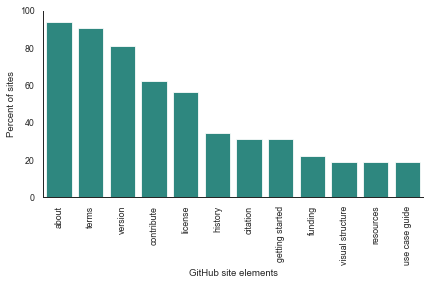

In [13]:
sns.set_style("white")
sns.set_context("paper")
all_pages_barplot = sns.barplot(x="GitHub_elements", 
                                y = "percent", 
                                data = all_pages_df, 
                                color="#1F968BFF",
                               order = result['GitHub_elements'])
all_pages_barplot.set(xlabel = "GitHub site elements", 
                      ylabel = "Percent of sites")
all_pages_barplot.set_xticklabels(all_pages_barplot.get_xticklabels(), 
                                  rotation=90)
all_pages_barplot.set_xticklabels(['about','terms','version','contribute','license','history','citation','getting started','funding','visual structure','resources','use case guide'])
sns.despine(top=True)
plt.tight_layout(h_pad=2)
plt.ylim(0,100)
plt.savefig('all__repositories.jpg', dpi=300)